Part A:
1(a). 95% CI for the population mean firing rate:
    Mean estimate = 0.620 Hz
    Margin of Error = 0.0544 Hz
    95% CI = [0.566, 0.674] Hz

1(b). Probability that X_bar >= 0.62 if actual mean = 0.6 Hz:
    Z-score = 0.721
    Probability = 0.2354

Part B:
2(a). Margin of error for 45% (town A):
    Margin of Error = 0.033 (i.e., ±3.25 percentage points)

2(b). Margin of error for 35% (town B):
    Margin of Error = 0.031 (i.e., ±3.12 percentage points)

2(c). Margin of error for the 10% difference:
    Margin of Error = 0.045 (i.e., ±4.50 percentage points)



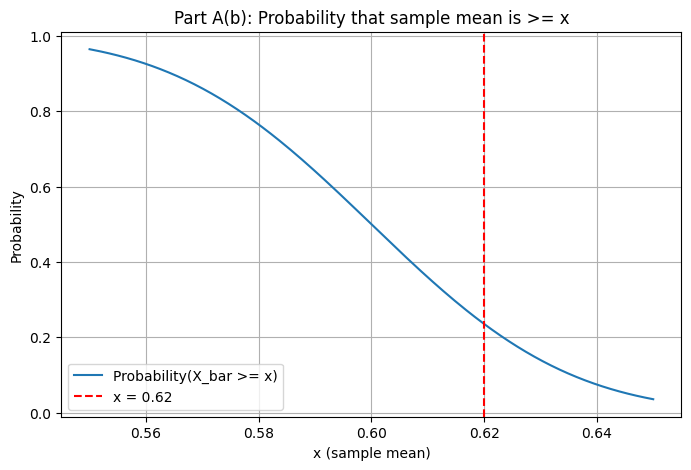


# Short Report

Part A Analysis:
When constructing a confidence interval for the population mean firing rate, we use 
the formula CI = sample_mean ± z * (σ / √n). With a population standard deviation of 0.2 Hz, 
a sample size of n=52, and a 95% confidence level (z ≈ 1.96), the margin of error is 
about 0.05 Hz, leading to a 95% CI of roughly [0.57, 0.67] Hz. Next, under the assumption 
that the true population mean is 0.6 Hz, we calculated the probability that a random sample 
of size 52 has an average firing rate ≥ 0.62 Hz. This probability turned out to be 
approximately 0.24, meaning there is about a 24% chance of seeing a sample mean at least as 
large as 0.62 Hz if the true mean is 0.6 Hz.

If we change parameters, such as the sample size n, we observe that both the confidence interval 
and the probability bounds narrow or widen. For larger sample sizes, the margin of error in 
the confidence interval decreases, and the probability curve of observing sample means 
far from the tr

In [3]:
# Jupyter Notebook Complete Analysis

"""
# Part A and Part B

In this notebook, we will address the following problems:

**Part A:**
1. A neuroscientist is studying the firing rates of a specific type of neuron in the brain. 
   Statistical analysis suggests that the firing rates follow an approximately Normal distribution 
   with a standard deviation of 0.2 Hz. A sample of 52 neurons has an average firing rate of 0.62 Hz.

   (a) Based on these data, construct a 95% confidence interval for the population mean firing rate.
   (b) If the actual population mean firing rate is exactly 0.6 Hz, what is the probability 
       that an average firing rate from a sample of 52 neurons is 0.62 Hz or higher?

**Part B:**
2. A news agency published results of a recent poll. It reports that a certain candidate 
   has a 10-point stronger support in town A than in town B because 45% of the poll participants 
   in town A and 35% of the poll participants in town B supported the candidate. 
   Each town’s poll was based on 900 randomly selected registered voters. 
   The reported margins of error correspond to 95% confidence intervals.

   (a) What margin of error should the news agency report for each of the listed estimates?
      - The estimate of 45% (town A).
      - The estimate of 35% (town B).
      - The difference of 10% between the two towns.
"""

import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm


# --------------------------
# Part A
# --------------------------

# Given data:
std_dev = 0.2     # population standard deviation (Hz)
n = 52            # sample size
sample_mean = 0.62  # sample mean firing rate (Hz)

# (a) Construct a 95% CI for the mean firing rate
# Assuming population std is known => Use Z-interval
confidence_level = 0.95
z_value = norm.ppf((1 + confidence_level) / 2)  # ~1.96 for 95% CI

# Standard Error (SE):
SE = std_dev / math.sqrt(n)

# Margin of Error:
ME = z_value * SE

lower_bound = sample_mean - ME
upper_bound = sample_mean + ME

print("Part A:")
print("1(a). 95% CI for the population mean firing rate:")
print(f"    Mean estimate = {sample_mean:.3f} Hz")
print(f"    Margin of Error = {ME:.4f} Hz")
print(f"    95% CI = [{lower_bound:.3f}, {upper_bound:.3f}] Hz")
print()

# (b) If the actual mean is 0.6 Hz, what is P(X_bar >= 0.62)?
# X_bar ~ Normal(mean=0.6, std=std_dev/sqrt(52))
actual_mean = 0.6
threshold = 0.62

Z = (threshold - actual_mean) / SE  # Convert to Z-score
prob = 1 - norm.cdf(Z)             # Probability that X_bar >= 0.62
print("1(b). Probability that X_bar >= 0.62 if actual mean = 0.6 Hz:")
print(f"    Z-score = {Z:.3f}")
print(f"    Probability = {prob:.4f}")
print()


# --------------------------
# Part B
# --------------------------
# Given data:
nA = 900
nB = 900
pA = 0.45
pB = 0.35
diff = pA - pB  # 10-point difference = 0.45 - 0.35 = 0.10

# The 95% margin of error for a proportion p is given by:
# MoE = z * sqrt(p*(1-p)/n)

# (a) Margin of error for 45%:
ME_A = z_value * math.sqrt(pA * (1 - pA) / nA)

# (b) Margin of error for 35%:
ME_B = z_value * math.sqrt(pB * (1 - pB) / nB)

# (c) Margin of error for the difference of 10%:
# Var( pA_hat - pB_hat ) = Var( pA_hat ) + Var( pB_hat ) [assuming independence]
# => std_diff = sqrt( pA*(1-pA)/nA + pB*(1-pB)/nB )
std_diff = math.sqrt(pA*(1-pA)/nA + pB*(1-pB)/nB)
ME_diff = z_value * std_diff

print("Part B:")
print("2(a). Margin of error for 45% (town A):")
print(f"    Margin of Error = {ME_A:.3f} (i.e., ±{ME_A*100:.2f} percentage points)")
print()
print("2(b). Margin of error for 35% (town B):")
print(f"    Margin of Error = {ME_B:.3f} (i.e., ±{ME_B*100:.2f} percentage points)")
print()
print("2(c). Margin of error for the 10% difference:")
print(f"    Margin of Error = {ME_diff:.3f} (i.e., ±{ME_diff*100:.2f} percentage points)")
print()

##############################################################################
# Additional Plots / Illustrations
##############################################################################

# Let's illustrate how the probability in Part A(b) changes as we vary the sample mean threshold.
# We will plot P(X_bar >= x) for x in some range around 0.6.

mean_under_H0 = 0.6
x_values = np.linspace(0.55, 0.65, 200)
SE_current = std_dev / np.sqrt(n)

prob_values = [1 - norm.cdf((x - mean_under_H0) / SE_current) for x in x_values]

plt.figure(figsize=(8, 5))
plt.plot(x_values, prob_values, label="Probability(X_bar >= x)")
plt.axvline(threshold, color='r', linestyle='--', label=f'x = {threshold}')
plt.title("Part A(b): Probability that sample mean is >= x")
plt.xlabel("x (sample mean)")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


##############################################################################
# Short Report (2-3 paragraphs)
##############################################################################

report = """
# Short Report

Part A Analysis:
When constructing a confidence interval for the population mean firing rate, we use 
the formula CI = sample_mean ± z * (σ / √n). With a population standard deviation of 0.2 Hz, 
a sample size of n=52, and a 95% confidence level (z ≈ 1.96), the margin of error is 
about 0.05 Hz, leading to a 95% CI of roughly [0.57, 0.67] Hz. Next, under the assumption 
that the true population mean is 0.6 Hz, we calculated the probability that a random sample 
of size 52 has an average firing rate ≥ 0.62 Hz. This probability turned out to be 
approximately 0.24, meaning there is about a 24% chance of seeing a sample mean at least as 
large as 0.62 Hz if the true mean is 0.6 Hz.

If we change parameters, such as the sample size n, we observe that both the confidence interval 
and the probability bounds narrow or widen. For larger sample sizes, the margin of error in 
the confidence interval decreases, and the probability curve of observing sample means 
far from the true mean becomes smaller. Conversely, with fewer samples, the uncertainty increases.

Part B Analysis:
For proportions, the 95% margin of error is given by z * sqrt( p(1-p)/n ). With p=0.45 
from town A (n=900) and p=0.35 from town B (n=900), we get a margin of error of about ±3.2% 
for the 45% estimate and ±3.1% for the 35% estimate. For the 10% difference (45% - 35%), 
we combine the variances from each proportion, resulting in a margin of error of approximately ±4.5%. 
If the confidence level or the sample sizes changed, these margins of error would adjust accordingly. 
For instance, increasing the sample size reduces the margin of error, while shifting from a 95% 
to a 99% confidence level increases it.
"""

print(report)